In this Data Science Project we will evaluate the Performance of a student using Machine Learning techniques and python.

In [2]:
!pip install dabl

     -------------------------------------- 559.0/559.0 KB 2.0 MB/s eta 0:00:00


In [3]:
# lets start with importing the libraries :
# for some basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl

import warnings
warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv('performance.csv')

# getting the shape of the data
df.shape

(1000, 8)

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [8]:
number_cols = df.shape[0]
missing_rate  = df.isnull().sum()/number_cols
missing_rate

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=2.01E+03'}, xlabel='reading score', ylabel='math score'>,
         <AxesSubplot:title={'center':'F=1.81E+03'}, xlabel='writing score'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=6.74E-02'}, xlabel='math score', ylabel='gender'>,
         <AxesSubplot:title={'center':'F=3.49E-02'}, xlabel='math score', ylabel='race/ethnicity'>,
         <AxesSubplot:title={'center':'F=2.44E-02'}, xlabel='math score', ylabel='parental level of...'>,
         <AxesSubplot:title={'center':'F=1.43E-02'}, xlabel='math score', ylabel='lunch'>,
         <AxesSubplot:title={'center':'F=3.22E-03'}, xlabel='math score', ylabel='test preparation ...'>]],
       dtype=object)]

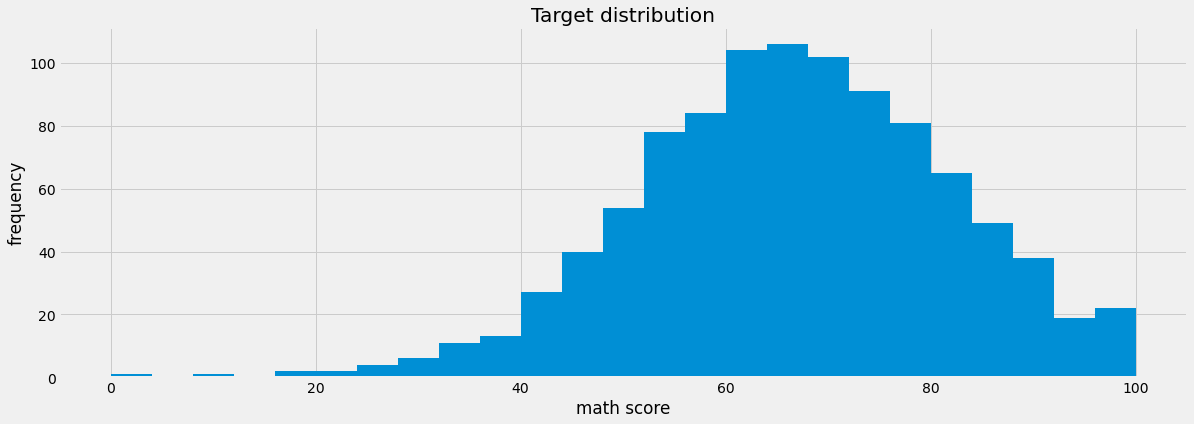

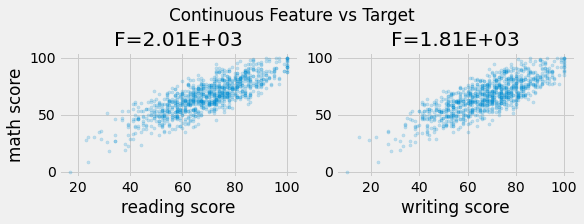

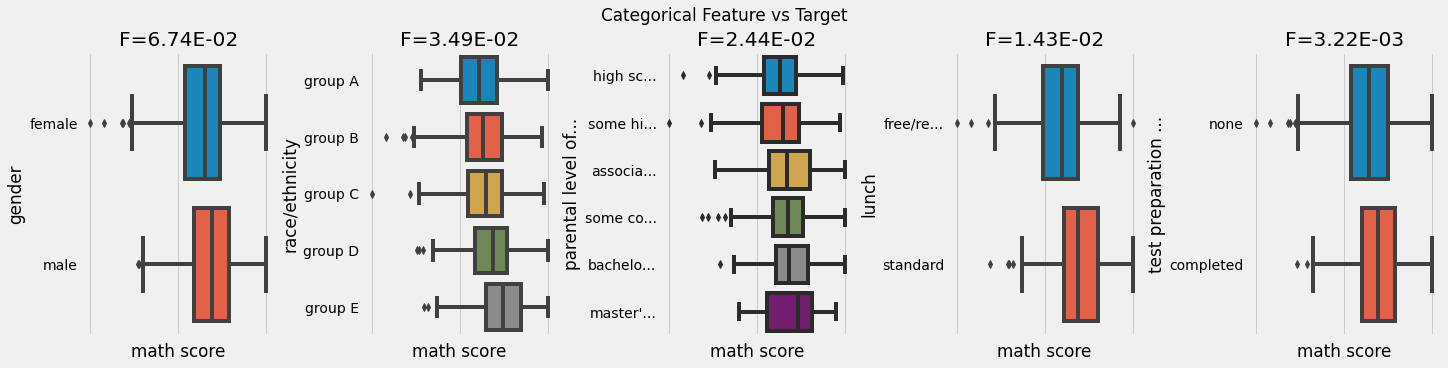

In [10]:
# To see comparison of all other attributes with respect to Math Marks
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(df, target_col = 'math score');

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=1.02E+04'}, xlabel='writing score', ylabel='reading score'>,
         <AxesSubplot:title={'center':'F=2.01E+03'}, xlabel='math score'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=3.70E-02'}, xlabel='reading score', ylabel='gender'>,
         <AxesSubplot:title={'center':'F=2.91E-02'}, xlabel='reading score', ylabel='race/ethnicity'>,
         <AxesSubplot:title={'center':'F=2.13E-02'}, xlabel='reading score', ylabel='parental level of...'>,
         <AxesSubplot:title={'center':'F=1.96E-02'}, xlabel='reading score', ylabel='lunch'>,
         <AxesSubplot:title={'center':'F=8.75E-03'}, xlabel='reading score', ylabel='test preparation ...'>]],
       dtype=object)]

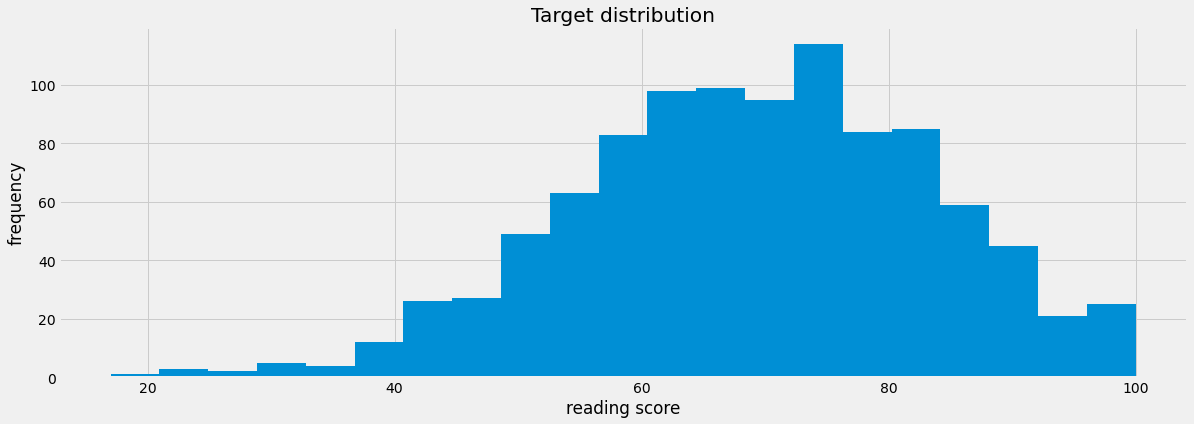

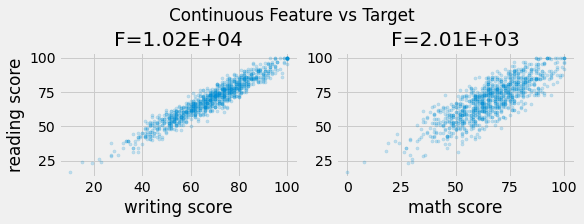

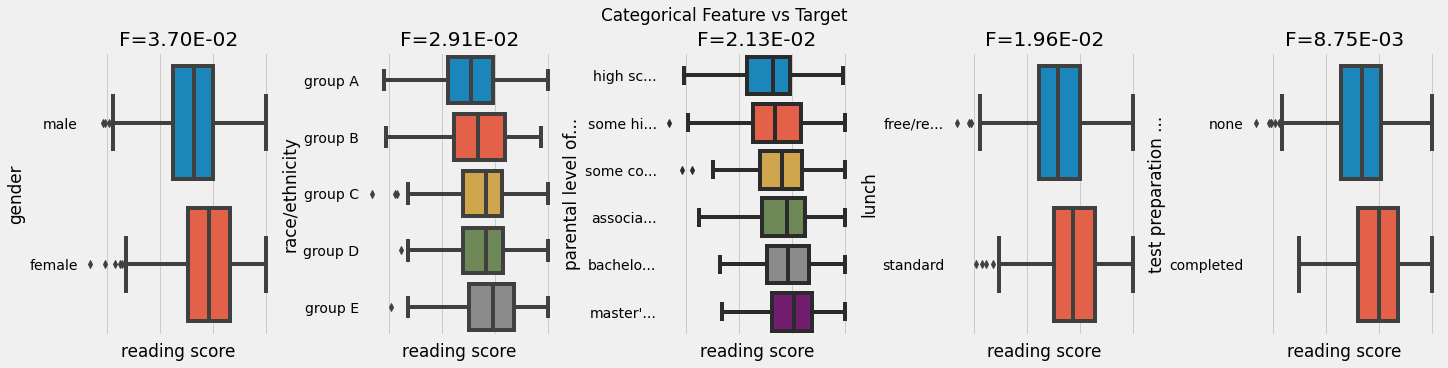

In [11]:
# Comparison of all other attributes with respect to Reading Marks :

plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(df, target_col = 'reading score')

In [12]:
# Lets check the Effect of Lunch on Student’s Performnce

df[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [13]:
# Lets check the Effect of Test Preparation Course on Scores
df[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

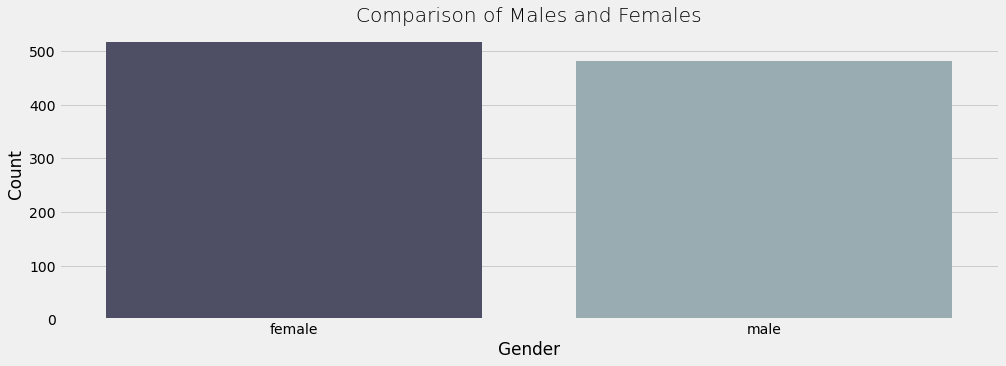

In [14]:
# Visualizing the number of male and female in the data set
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(df['gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

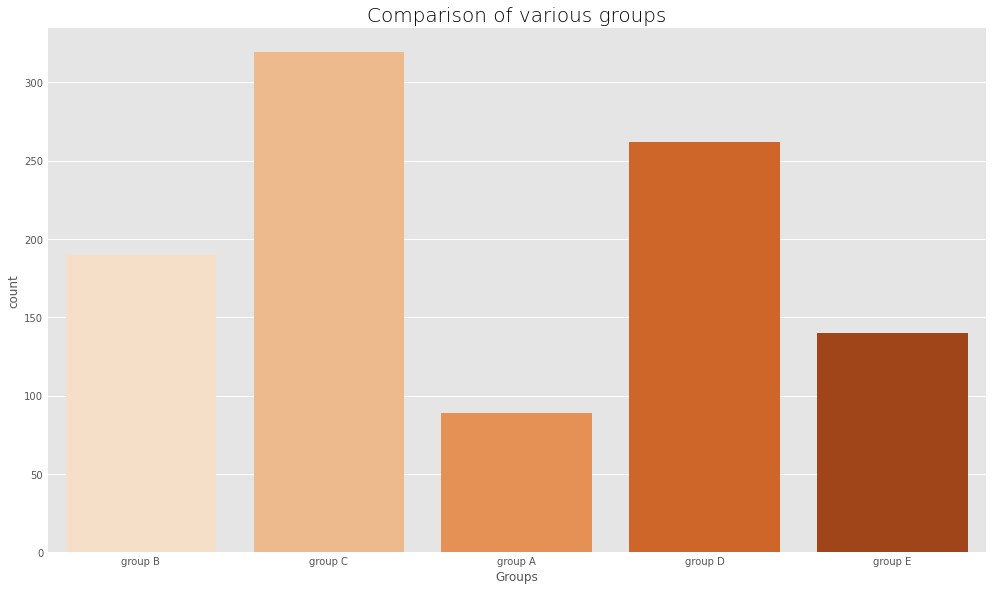

In [17]:
# Visualizing the different groups
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

sns.countplot(df['race/ethnicity'], palette = 'Oranges')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

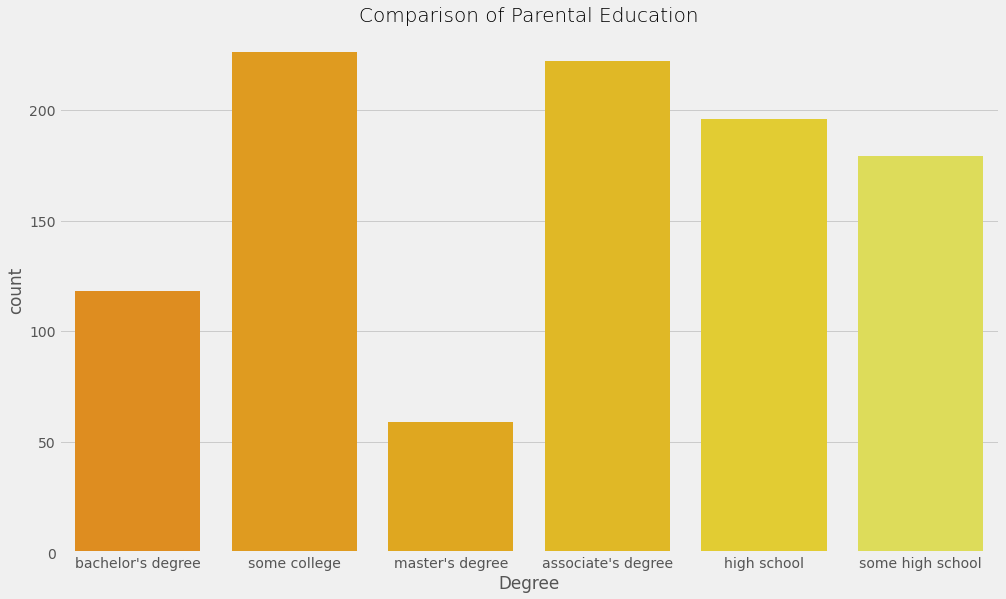

In [19]:
# Visualizing the different parental education levels

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(df['parental level of education'], palette = 'Wistia_r')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

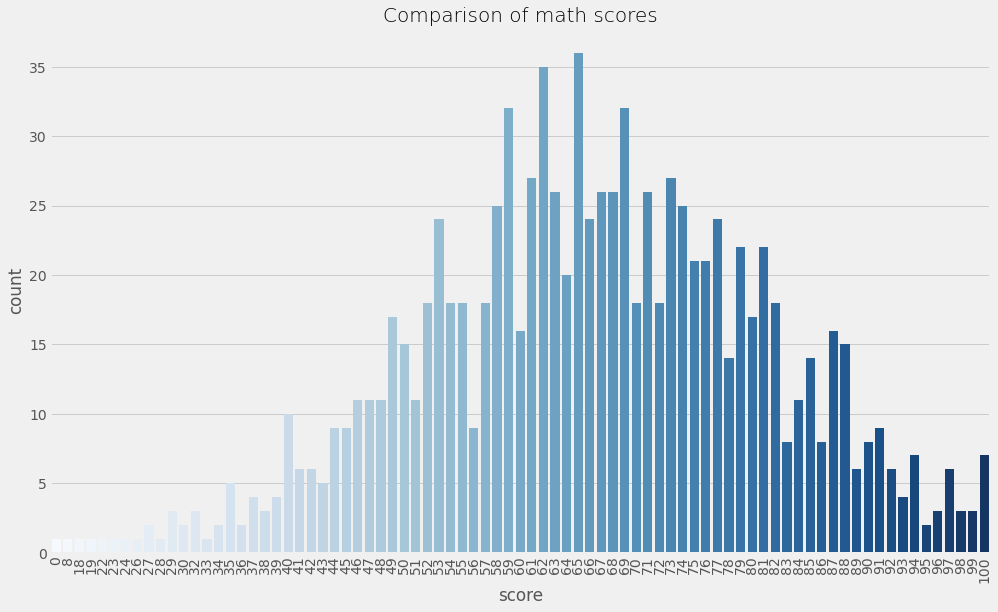

In [23]:
# Visualizing Maths score
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(df['math score'], palette = 'Blues')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

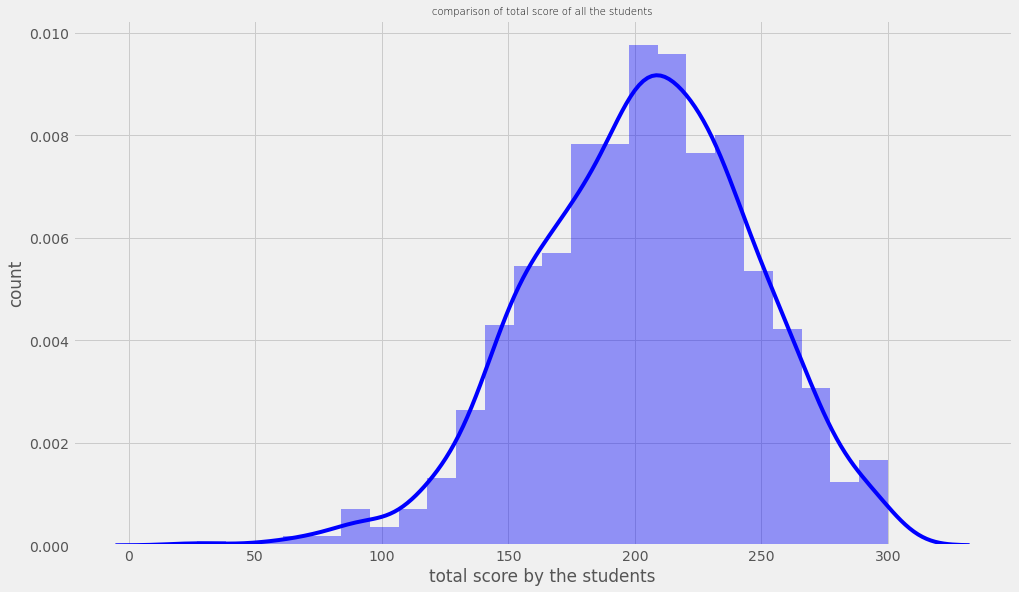

In [25]:
# Computing the total score for each student
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

sns.distplot(df['total_score'], color = 'blue')

plt.title('comparison of total score of all the students', fontweight = 20, fontsize = 10)
plt.xlabel('total score by the students')
plt.ylabel('count')
plt.show()

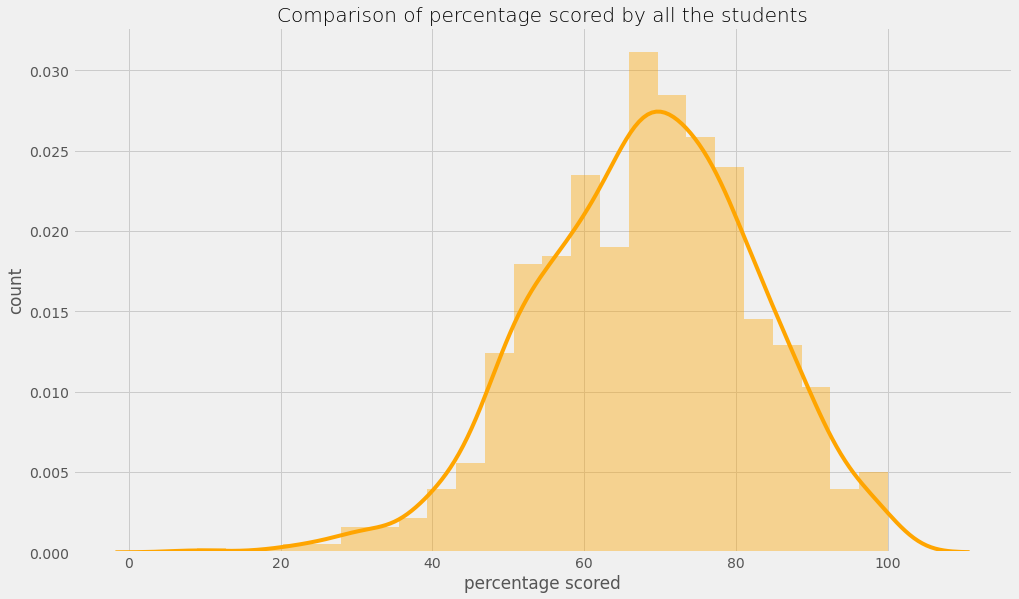

In [28]:
# Computing percentage for each of the students
# importing math library to use ceil
from math import * 

df['percentage'] = df['total_score']/3

for i in range(0, 1000):
    df['percentage'][i] = ceil(df['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(df['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('percentage scored')
plt.ylabel('count')
plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   percentage                   1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


In [38]:
def getstatus(num):  
    if num>=40:
        return "Success"  
    else:
        return "Fail"

In [43]:
df['avg_score']=df['total_score']/3
df['status'] = df['avg_score'].apply(lambda x: 'Success' if x >= 40 else 'Fail')

In [44]:
# Assigning grades to the grades according to the following criteria :
# 0  -# 40 marks : grade F
# 41 -# 60 marks : grade D
# 60 - 70 marks : grade C
# 70 - 80 marks : grade B
# 80 - 90 marks : grade A
# 90 - 100 marks : grade A+

def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

df['grades'] = df.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

df['grades'].value_counts()

B    260
C    252
D    244
A    156
O     58
E     30
Name: grades, dtype: int64

In [47]:
df['pass_math'] = df['math score'].apply(lambda x: 'Success' if x >= 40 else 'Fail')
df['pass_reading'] = df['reading score'].apply(lambda x: 'Success' if x >= 40 else 'Fail')
df['pass_writing'] = df['writing score'].apply(lambda x: 'Success' if x >= 40 else 'Fail')

In [48]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
df['test preparation course'] = le.fit_transform(df['test preparation course'])

# label encoding for lunch
df['lunch'] = le.fit_transform(df['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
df['race/ethnicity'] = df['race/ethnicity'].replace('group A', 1)
df['race/ethnicity'] = df['race/ethnicity'].replace('group B', 2)
df['race/ethnicity'] = df['race/ethnicity'].replace('group C', 3)
df['race/ethnicity'] = df['race/ethnicity'].replace('group D', 4)
df['race/ethnicity'] = df['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
df['parental level of education'] = le.fit_transform(df['parental level of education'])

#label encoding for gender
df['gender'] = le.fit_transform(df['gender'])

# label encoding for pass_math
df['pass_math'] = le.fit_transform(df['pass_math'])

# label encoding for pass_reading
df['pass_reading'] = le.fit_transform(df['pass_reading'])

# label encoding for pass_writing
df['pass_writing'] = le.fit_transform(df['pass_writing'])

# label encoding for status
df['status'] = le.fit_transform(df['status'])

In [55]:
df.drop(['grades'], axis=1, inplace=True)

In [57]:
# Data Preparation : Splitting the dependent and independent variables
x = df.iloc[:,:14]
y = df.iloc[:,14]

x.shape, y.shape

((1000, 14), (1000,))

In [58]:
# Splitting the data set into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 14)
(750,)
(250, 14)
(250,)


In [59]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [60]:
from sklearn.decomposition import PCA

# creating a principal component analysis model
pca = PCA(n_components = None)

# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# visualising the principal components that will explain the highest share of variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# creating a principal component analysis model
pca = PCA(n_components = 2)

# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

[2.53070121e-01 2.12970349e-01 1.94880479e-01 1.21549129e-01
 9.42762921e-02 6.78366562e-02 3.85594310e-02 1.07304115e-02
 3.22900301e-03 1.90512958e-03 9.86524992e-04 6.47321156e-06
 3.72284035e-33 1.79739966e-33]


In [61]:
# Modelling . Logistic Regression

from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9866666666666667
Testing Accuracy : 0.972


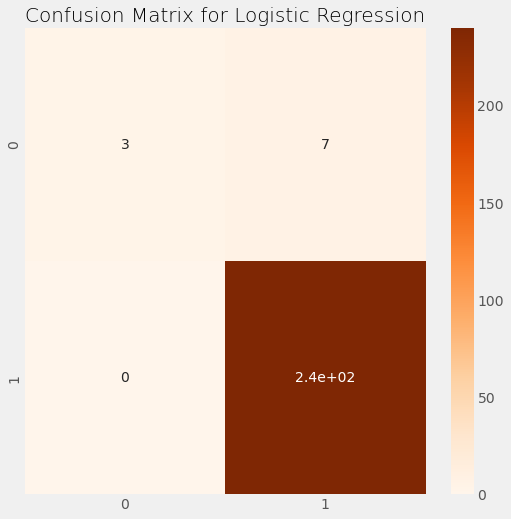

In [62]:
# Printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Oranges')
plt.title('Confusion Matrix for Logistic Regression', fontweight = 30, fontsize = 20)
plt.show()

In [63]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.988


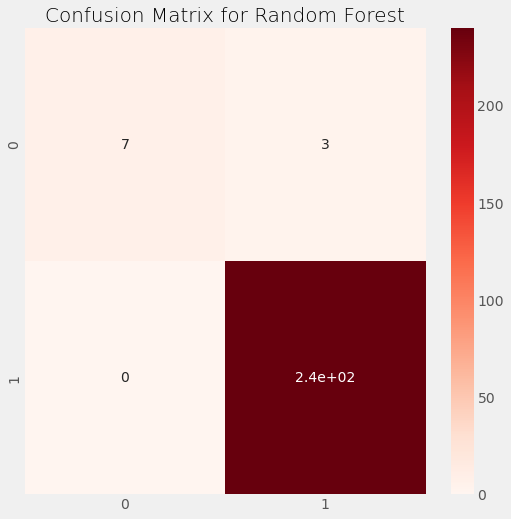

In [64]:

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()

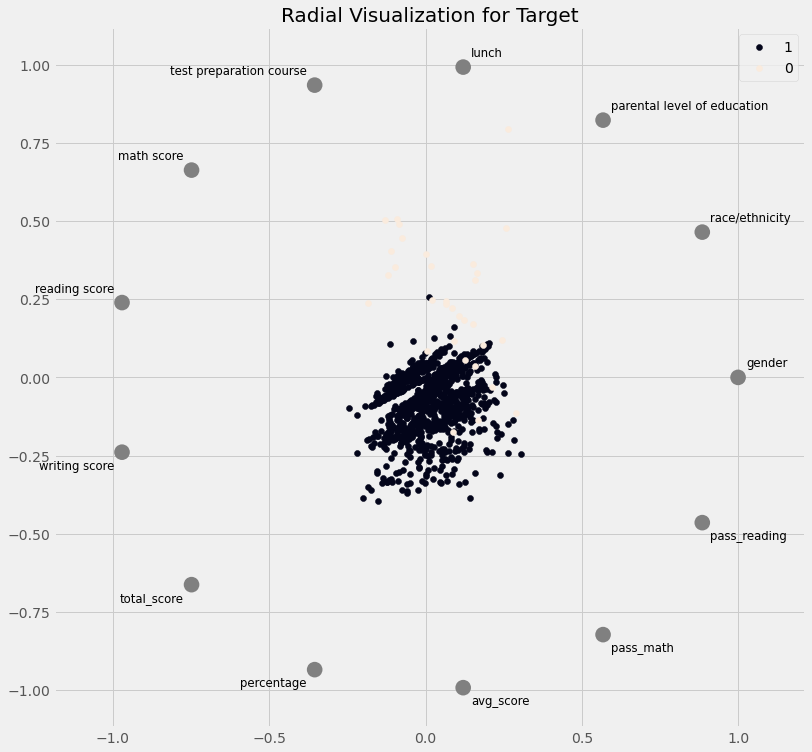

In [65]:
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(12, 12))
new_df = x.copy()
new_df["status"] = y
radviz(new_df, "status", ax=ax, colormap="rocket")
plt.title('Radial Visualization for Target', fontsize = 20)
plt.show()



That gives a clear idea that students getting very low grades have high correlation on lunch and parental education